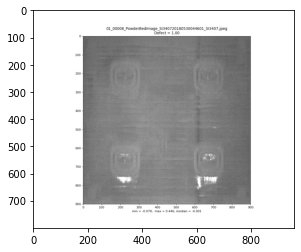

(800, 960, 3)

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

#image = cv2.imread('./figs/demo/patches/01_00340_PowderBedImage_SI296020170714094953_SI2960_0_0.png')
image = cv2.imread('./figs/cnn_train_m400/01_00008_PowderBedImage_SI340720180530044601_SI3407.jpeg')
#image = cv2.imread('./figs/cnn_train2/patches/01_00008_PowderBedImage_SI340720180530044601_SI3407/01_00008_PowderBedImage_SI340720180530044601_SI3407_16_560.png')
plt.imshow(image)
plt.show()
image.shape

In [5]:
import PIL
from PIL import Image

imge_pil = Image.open('./figs/cnn_train_m400/patches/01_05254_PowderBedImage_SI340720180924103406_SI3407/01_05254_PowderBedImage_SI340720180924103406_SI3407_144_624.png')

out = imge_pil.transpose(PIL.Image.FLIP_LEFT_RIGHT)
out.show()
out.save('transpose-output.png')

out2 = imge_pil.transpose(PIL.Image.FLIP_TOP_BOTTOM)
out2.save('transpose-output2.png')

In [1]:
from PIL import Image
from PIL import ImageEnhance

#imge_pil = Image.open('./figs/cnn_train_m400/01_00008_PowderBedImage_SI340720180530044601_SI3407.jpeg')
#imge_pil = Image.open('./figs/cnn_train_m400/01_00419_PowderBedImage_SI296520180514165718_SI2965.jpeg')
imge_pil = Image.open('./figs/cnn_train_m400/01_00419_PowderBedImage_SI296520180514165718_SI2965.jpeg')
patches\01_05254_PowderBedImage_SI340720180924103406_SI3407
rgb_im = imge_pil.convert('RGB')
contr_enhancer = ImageEnhance.Contrast(rgb_im)
contr_factor = 0.8  # 0.7 ~ 1.2
im_enhanced = contr_enhancer.enhance(contr_factor).show("Contrast %f" % contr_factor)
plt.imshow(im_enhanced)
plt.show()

NameError: name 'plt' is not defined

In [40]:
#imge_pil = Image.open('./figs/demo/patches/01_00340_PowderBedImage_SI296020170714094953_SI2960_0_0.png')
imge_pil = Image.open('./figs/cnn_train_m400/01_00008_PowderBedImage_SI340720180530044601_SI3407.jpeg')
#imge_pil = Image.open('./figs/cnn_train_m400/01_00419_PowderBedImage_SI296520180514165718_SI2965.jpeg')
rgb_im = imge_pil.convert('RGB')
br_enhancer = ImageEnhance.Brightness(rgb_im)
br_factor = 1.3  # 0.7 ~ 1.3
im_br_enhanced = br_enhancer.enhance(br_factor).show("Brightness %f" % factor)
#np.array(im_br_enhanced)

In [ ]:
from datetime import datetime
import time

# current date and time
now = datetime.now()

timestamp = datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d %H:%M:%S').replace(":", "-")
print("timestamp =", timestamp)

In [ ]:
h, w, _ = image.shape
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
#thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
plt.imshow(thresh,cmap='gray')
plt.show()

In [ ]:
mean, std = cv2.meanStdDev(gray)

if std < 5:
    print('STD: '+str(std) + ' Mostly Background')
else:
    print('STD: '+str(std) + ' Interesting')

In [ ]:
from skimage.measure import shannon_entropy

entr = shannon_entropy(gray)

if entr < 4:
    print('Entropy: '+str(entr) + ' Mostly Background')
else:
    print('Entropy: '+str(entr) + ' Interesting')

In [ ]:
pixels = cv2.countNonZero(thresh)
ratio = (pixels/(h * w)) * 100
print('Pixel ratio: {:.2f}%'.format(ratio))

if ratio < 50:
    print('Mostly Background')
else:
    print('Not Mostly Background')


In [ ]:
import cv2
import glob

def checkIfInteresting(image): 
    
    h, w, _ = image.shape
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray_image, 0, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY_INV)[1]
    pixels = cv2.countNonZero(thresh)
    ratio = (pixels/(h * w)) * 100   
    if ratio > 50:
        return ratio

count = 0
for imageName in glob.glob('./figs/demo/patches/*.png'):
    image = cv2.imread(imageName)
    if checkIfInteresting(image):
        print(str(imageName.split("\\",1)[1] ) +'     Pixel ratio: ' + str(checkIfInteresting(image)))
        count += 1
        
print('No. of interesting patches found: '+ str(count) + '/' +str(len(glob.glob('./figs/demo/patches/*.png'))) )

In [ ]:
import cv2
import glob

def checkIfInterestingSTD(image): 
    
    h, w, _ = image.shape
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    mean, std = cv2.meanStdDev(gray_image)
    if std > 5:
        return std

def checkIfInterestingEntropy(image): 
    
    h, w, _ = image.shape
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    entr = shannon_entropy(gray_image)
    if entr > 4.3:
        return entr

count_std = 0
count_ent = 0
#for imageName in glob.glob('./figs/demo/patches/*.png'):
for imageName in glob.glob('./figs/cnn_train/patches/01_00008_PowderBedImage_SI340720180530044601_SI3407/*.png'):
    image = cv2.imread(imageName)
    stnd = checkIfInterestingSTD(image)
    entrp = checkIfInterestingEntropy(image)
    print(str(imageName.split("\\",1)[1] ) +'     Standard Deviation: ' + str(stnd) + '   Entropy: ' + str(entrp))
    if stnd is not None:
        count_std += 1
    if entrp is not None:
        count_ent += 1
        
print('No. of interesting patches found STD: '+ str(count_std) + '/' +str(len(glob.glob('./figs/demo/patches/*.png'))) )
print('No. of interesting patches found ENT: '+ str(count_ent) + '/' +str(len(glob.glob('./figs/demo/patches/*.png'))) )

In [ ]:
image = cv2.imread('./figs/cnn_train/patches/01_00103_PowderBedImage_SI239420180716125655_SI2394/01_00103_PowderBedImage_SI239420180716125655_SI2394_0_0.png')
plt.imshow(image,cmap='gray')
plt.show()
image.shape
np.isnan(np.sum(image))
image

In [ ]:
image = cv2.imread('./figs/cnn_train/01_00103_PowderBedImage_SI239420180716125655_SI2394.jpeg')
plt.imshow(image,cmap='gray')
plt.show()
image.shape
np.isnan(np.sum(image))
image